# Measures of Variability

Measures of spread and shape ask how much variability exists in the values of a dataset. The range is the distance from minimum to maximum, and as touched upon in the last workbook, the interquartile range is the distance from the 25th to 75th percentile. Outliers describe whether there are extreme values far away from the mode(s), and distribution tails describe how quickly probabilities drop off as we move away from the modes.

## Variance

Variance, denoted by sigma-squared ($\sigma^2$) in a population and $s^2$ in a sample, summarizes the variability of the dataset. It describes how much a random variable deviates from its mean, in squared units representing the average squared difference from the mean.

$$\sigma^2 = \frac{ \sum(x - \mu)^2 }{ n }$$

$$s^2 = \frac{(x - \bar{x})^2}{n-1}$$

<ul>
    <li>$x$ is the value of an instance in the dataset</li>
    <li>$\bar{x}$ is the average value</li>
    <li>$n$ is the number of observations</li>
</ul>

Squaring removes the effect of differences from the mean being both positive and negative, and results in treating greater differences with greater penalty.

Let's import some libraries to work with, and add a chart style:

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

And then generate some normally distributed data:

In [2]:
from scipy.stats import norm
mu = 0
sd = 1
data = norm.rvs(loc=mu, scale=sd, size=300, random_state=123)

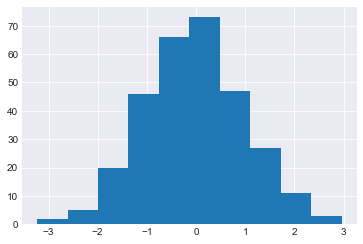

In [3]:
plt.hist(data);

And then calculate the variance:

In [4]:
# Calculate variance using built-in function
data.var()
np.var(data)

1.053795568707424

But are we looking at population variance or sample variance? One way to tell is to check the user guide, another way is to create the functions from scratch and see what matches.

In [5]:
def variance(dta, scope='pop'):
    n = len(dta)
    mean = sum(dta) / n
    deviations = [(data - mean) ** 2 for data in dta]
    if scope == 'pop':
        variance = sum(deviations) / n
    else:
        variance = sum(deviations) / (n-1)
    return variance

In [6]:
print('Pop Variance: ', variance(data, 'pop'))
print('Sample Variance: ', variance(data, 'sample'))

Pop Variance:  1.0537955687074239
Sample Variance:  1.0573199686027663


Notice that it is the population variance that matches the default of the built-in function. Notice as well that the difference between population variance and sample variance seems quite small. This is a result of the sample size being relatively large (n=300). A denominator of n-1 (i.e., 299) in this case makes little difference vs. a denominator of 300. Let's try with a smaller dataset, say 30 points.

In [7]:
mu = 0
sd = 1
n30_data = norm.rvs(loc=mu, scale=sd, size=30, random_state=123)
print('Pop Variance: ', variance(n30_data, 'pop'))
print('Sample Variance: ', variance(n30_data, 'sample'))

Pop Variance:  1.3624637354821543
Sample Variance:  1.4094452436022284


A denominator of 29 vs. a denominator of 30 makes about 3.33% difference, and the difference between the result of the population-variance calculation and the sample-variance calculation is noticably larger.

## Standard Deviation

Standard deviation, $\sigma$ or $s$, is the square root of variance, which unlike variance, has the advantage of being in the scale of the original data. It represents what is called the harmonic mean of the differences from the mean of the dataset.

You may have already considered that calculating this simply involves taking the square root of our variance formula.

In [8]:
print('Pop Standard Deviation: ', sqrt(variance(data, 'pop')))
print('Sample Standard Deviation: ', sqrt(variance(data, 'samp')))

Pop Standard Deviation:  1.0265454537951175
Sample Standard Deviation:  1.0282606520735715


Though we could also write a function for it specifically:

In [9]:
def std_dev(dta, scope='pop'):
    n = len(dta)
    mean = sum(dta) / n
    deviations = [(data - mean) ** 2 for data in dta]
    if scope == 'pop':
        stdev = sqrt( sum(deviations) / n )
    else:
        stdev = sqrt( sum(deviations) / (n-1) )
    return stdev

print('Pop Standard Deviation: ', std_dev(data, 'pop'))
print('Sample Standard Deviation: ', std_dev(data, 'samp'))

Pop Standard Deviation:  1.0265454537951175
Sample Standard Deviation:  1.0282606520735715


Or call upon the built-in function (there are implementations in various libraries as well)

In [10]:
data.std()

1.0265454537951177

Again, it defaults to using the population-based variance calculation, with $n$ rather than $n-1$ in the denominator.

## Coefficient of Variation

What if we want to compare the variability of two datasets that are on different scales? This is where the coefficient of variation comes into play.

The Coefficient of Variation is a ratio of the standard deviation to the mean. Sometimes it is computed as a percentage. It is a standardized measurement for $\sigma$ amongst the two datasets, whereas the statistic would otherwise be incomparable.

$$CV = \frac{100(\sigma)}{M}$$

In [11]:
mu1 = 30
sd1 = 1

mu2 = 80
sd2 = 6

cv1 = 100 * sd1 / mu1
cv2 = 100 * sd2 / mu2

print('CV 1: ', cv1)
print('CV 2: ', cv2)

CV 1:  3.3333333333333335
CV 2:  7.5


The second distribution has a greater variance proportional to the magnitude of its mean

## Standard Error

<b>Standard Error (SE)</b>, $\frac{\sigma}{\sqrt{n}}$ is the standard deviation reduced by a factor equal to the square root of the number of observations. You can see that greater sample sizes will yield lower standard error by increasing the value of the denominator.

In [12]:
mu = np.mean(data)
sd = np.std(data)
se = sd / sqrt(len(data))
print('Standard Error: ', se)

Standard Error:  0.059267629408399775


# Measures of Variability Between Two Data Sets

This next group of metrics - MSE, RMSE, and MAD, are often used when comparing two datasets - particularly in the context of predictions vs. observations... so I will generate two sets of simulated data, and call one set the actuals and the other predictions.

## MSE

In [13]:
sim_actuals = norm.rvs(loc=1, scale=2, size=300, random_state=123)
sim_predictions = norm.rvs(loc=1.5, scale=2, size=300, random_state=123)

Mean squared error is the average of the difference between the actual and predicted values squared.

$$MSE = \frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2$$

One library from which it may be imported as a function is sklearn.metrics

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sim_actuals, sim_predictions)

0.25

But it also is easy to create from scratch

In [15]:
def mse(actual, pred): 
    actual, pred = actual, pred
    return (actual - pred).mean()**2

mse(sim_actuals, sim_predictions)

0.25

## RMSE

Root Mean Squared Error (RMSE) tells you on average how far predictions are from the actuals, and is the defined as standard the deviation of the residuals. It is the square root of the squared residuals, divided by the number of observations.

$$RMSE = \sqrt{ \frac{1}{n} \sum(\hat{y}_i - y_i)^2 }$$

In [18]:
def rmse(actual, pred):
    return(sqrt(mean_squared_error(actual, pred)))

rmse(sim_actuals, sim_predictions)

0.5

As you can see, this is just calculated as the square root of mean squared error (MSE). Square-rooting either of our above versions of the MSE function will have the same result.

## MAD

<b>Mean (or Median) Absolute Deviation (MAD)</b> is perhaps more intuitive, particularly for beginners, as it does not involve squaring deviations, but rather averaging their absolute values.

$$MAD = \frac{1}{n} \sum_{i=1}^n |\hat{y}_i - y_i|$$

## Bonus: Skewness and Kurtosis

Perhaps it's a little unorthodox to now jump back in to measures of the spread of a distribution; but the below two metrics seem less-common than the above, though they have an interesting interpretation.

Mean and variance are considered the 1st and 2nd statistical 'moments', reflecting the raise of a distribution function to the power of 1 and 2, respectively.

<b>Skewness and Kurtosis</b> are the 3rd and 4th statistical moments, and speak toward the shape of the distribution, raising its function to the powers of 3 and 4 respectively.

### Skewness

Skewness values greater than zero suggest multimodal distribution to the left, meaning a long tail on the right, and vice versa for values less than zero

$$Skewness = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}} {s} \right)^3$$

First, let's experiment with the normal distribution we originally generated:

0.025571742158292405


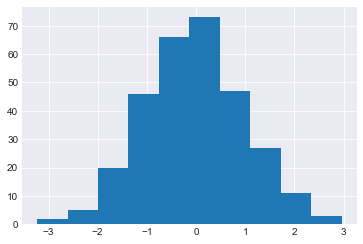

In [19]:
from scipy.stats import skew

print(skew([x for x in data], axis=0, bias=True))
plt.hist(data);

The skewness of our empirical normal distribution comes close to zero. Perhaps this is no shock, as the sampled distribution is quite symmetrical, as the analytical (i.e. theoretical) normal distribution is perfectly symmetrical.

But let's try a non-symmetrical distribution - the log-normal distribution - and see the result:

In [20]:
from scipy.stats import lognorm
mu = 0
sd = 1
logdata = lognorm.rvs(loc=mu, s=1, size=300, random_state=123)

3.7805430308893246


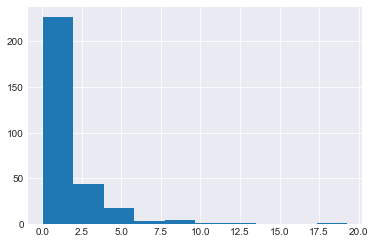

In [21]:
print(skew([x for x in logdata], axis=0, bias=True))
plt.hist(logdata);

### Kurtosis

Kurtosis measures the peakedness of a frequency distribution; higher kurtosis levels reflect a pointier distribution (known as leptokurtic). It is common to subtract 3 from kurtosis, in order to speak of excess kurtosis vs. the standard normal distribution.

$$Kurtosis = \frac{(n)(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{x_i - \bar{x}} {s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$$

-0.01391455334004954


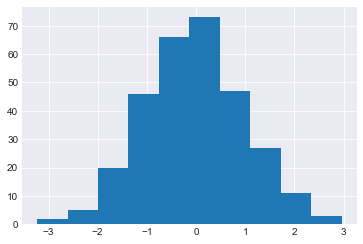

In [22]:
from scipy.stats import kurtosis

print(kurtosis([x for x in data], axis=0, bias=True))
plt.hist(data);

The excess kurtosis comes very close to zero. Now, let's see what the statistic shows for our log-normal distribution

20.795270369671304


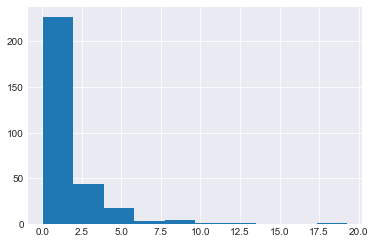

In [23]:
print(kurtosis([x for x in logdata], axis=0, bias=True))
plt.hist(logdata);

As expected, the output statistic has a very different value